This code generates the bifurcation plots from the data generated through parameter continuation. on data obtained through parameter continuation. It processes the data files s.Example3_a, s.Example3_b and plots the ordinate ($m(l) + r(l) \times n(l)$) against the parameter ($\alpha$). The stability information is not represented here. The stability transitions near the folds can be established using the information provided in the article. However, the stability index of the initial solution must be known beforehand. Additionally, the program visualizes elastica shapes for selected labels, which can be identified from the Auto-07p terminal output.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
il=1
Lam1=[]
filename="s.Example3_a"
f=open(filename,"r")
db1=[];
db_comp_1=[];
db_comp_2=[];
Nl=1
s=[];
S=[];
X=[];
Y=[];
x=[];
y=[];
Psi=[];
Alf=[];
Eps=[];
Th=[];

while(1):
    A=f.readline()
    if (A==''):
        break
    K=A.split()
    for i in range(0,int(K[8])-1):
        B=f.readline()
        Bb=B.split()
     
        if ( i< (int(K[6])*Nl) ):    # Data along the rod: Position vectors for displaying elastica configurations
            x.append(float(Bb[1]))
            y.append(float(Bb[2]))
        
        if (i== (int(K[6])*Nl)-1):   # Data from the free end	
            s.append(float(Bb[0]))
            rx=float(Bb[1])          # x
            ry=float(Bb[2])          # y
            nx=float(Bb[3])          # nx
            ny=float(Bb[4])          # ny
            m=float(Bb[6])           # m
            Th.append(float(Bb[5]))  # theta
            db1.append(+m + (rx*ny - ry*nx));  #Ordinate
        if (i== 0):
            db_comp_1.append(-float(Bb[6]))

    B=f.readline();
    Bb=B.split()
    alf=float(Bb[3])
    Lam1.append(alf)
    Alf.append(alf)
    Eps.append(float(Bb[0]))
    Psi.append(float(Bb[1]))
    X.append(x)
    Y.append(y)
    x=[]
    y=[]
    
Lam2=[]
filename="s.Example3_b"
f=open(filename,"r")
db2=[];
while(1):
    A=f.readline()
    if (A==''):
        break
    K=A.split()
    for i in range(0,int(K[8])-1):
        B=f.readline()
        Bb=B.split()    
        if (i== (int(K[6])*Nl)-1):	
            s.append(float(Bb[0]))
            m=float(Bb[6])
            rx=float(Bb[1])
            ry=float(Bb[2])
            nx=float(Bb[3])
            ny=float(Bb[4])
            db2.append(+m + (rx*ny - ry*nx)); 
            #m2.append(float(Bb[6]));  

        if (i== 0):
            db_comp_2.append(-float(Bb[6]))
    
    B=f.readline();
    Bb=B.split()
    alf=float(Bb[3])
    Psi.append(float(Bb[1]))
    Lam2.append(alf)
    #S.append(s)
    s=[]

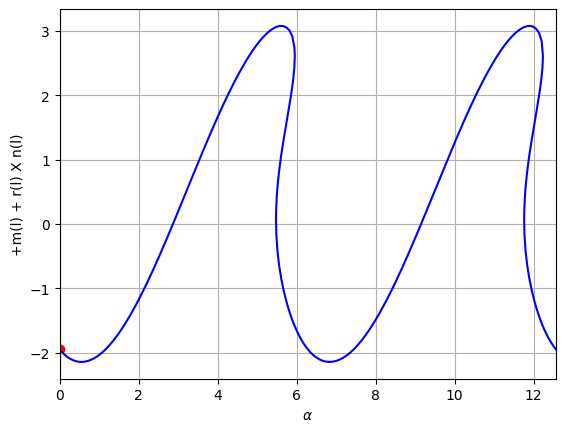

In [21]:
plt.plot(Lam1,db1,color="b")
#plt.plot(Lam1,db_comp_1,color="k")


plt.plot(Lam2,db2,color="b")
plt.scatter([Lam1[0]],[db1[0]],color="r")
#plt.scatter([Lam2[0]],[db2[0]])
plt.xlabel("$\\alpha$")
plt.ylabel("+m(l) + r(l) X n(l)")
plt.xlim([-12.56*0,12.56])
plt.grid()
plt.show()

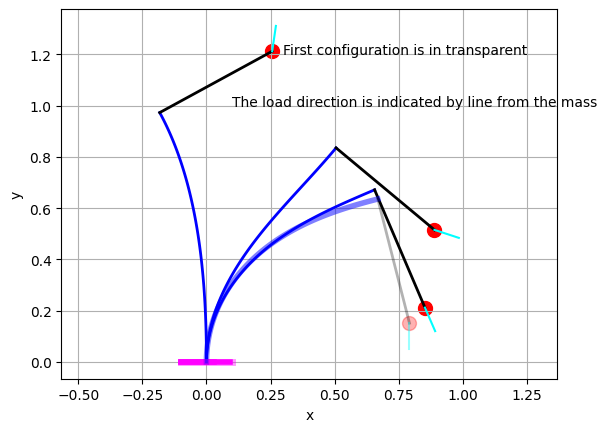

In [19]:
LAB=[8,20,45];
b=0.1;
wb=0.1

for j in range(0,len(LAB)):
    i=LAB[j];
    plt.plot(X[i],Y[i],color='b',linewidth=2)
    plt.plot([X[i][-1], X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[Y[i][-1], Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])],color='k',linewidth=2)
    plt.scatter([ X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[ Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])], color='red', s=100)
    plt.plot([-b*np.cos(0),b*np.cos(Lam1[i])],[-b*np.sin(0),b*np.sin(0)],color='magenta',linewidth=4)
    plt.plot([X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i]),X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])+ wb*np.sin(Lam1[i])],[Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i]),Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i]) - wb*np.cos(Lam1[i])], color='cyan')

    
i=0
plt.plot(X[0],Y[0],color='b',linewidth=4,alpha=0.5)
plt.plot([X[0][-1], X[0][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[Y[0][-1], Y[0][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])],color='k',linewidth=2,alpha=0.3)
plt.scatter([ X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[ Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])], color='red', s=100,alpha=0.3)
plt.plot([-b*np.cos(0),b*np.cos(0)],[-b*np.sin(0),b*np.sin(0)],color='magenta',linewidth=5,alpha=0.4)
plt.plot([X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i]),X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])+ wb*np.sin(Lam1[i])],[Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i]),Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i]) - wb*np.cos(Lam1[i])], color='cyan',alpha=0.4)

plt.text(0.3,1.2,"First configuration is in transparent")
plt.text(0.1,1.0,"The load direction is indicated by line from the mass")

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()